In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from shapely import box
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

In [2]:
prj = ccrs.EquidistantConic(standard_parallels=(35,60))
world = gpd.read_file('../day3_polygons/ne_10m_admin_0_countries.zip').to_crs(prj)

# get bounding box from lat,lon into projected  coords
aoi = gpd.GeoSeries([box(-17,34,33,72)], crs=4326).to_crs(prj)
minx,miny,maxx,maxy = aoi.total_bounds

# make list of longiutdes at 1.25 degree intervals 
minlon, maxlon = -100.0, 100.0
lons = [(i*1.25) + minlon for i in range(round((maxlon-minlon) / 1.25))]
minutes = [5*(i/1.25) for i in lons]

# make timezone boxes
boxes = []
for i in range(0,len(lons)-2,2):
    boxes.append(box(lons[i],20,lons[i+1],80))
zones = gpd.GeoDataFrame(geometry=boxes,crs=4326).to_crs(prj)

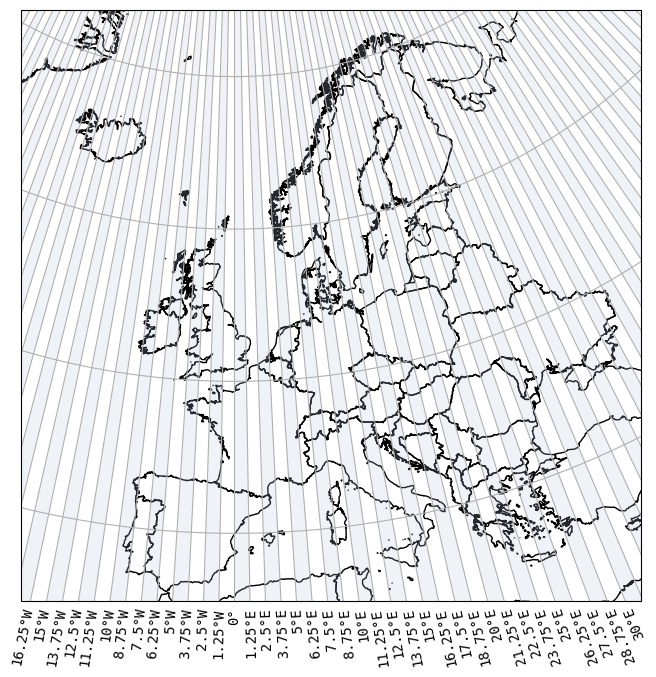

In [3]:
fig, ax = plt.subplots(figsize=[8,8],
                       subplot_kw={'projection':prj})

world.plot(fc='none', ax=ax)
zones.plot(fc='lightsteelblue',ec='none', alpha=0.2, ax=ax)

ax.set_xlim(minx,maxx)
ax.set_ylim(miny,maxy)

gl = ax.gridlines(ccrs.PlateCarree(), xlocs=lons)
gl.xlocator = mticker.FixedLocator(lons)
gl.bottom_labels = True
gl.left_labels = False

ew = {'E':1,
      'W':-1,
      '':0}

In [4]:
## not sure why but this only works if it is not in the same cell as the above...

# relabelling - swapping lon degrees for label in minutes
new_labels = [(float(s.split('°')[0]) / 1.25) * 5 * ew[s.split('°')[-1]] for s in [q.get_text() for q in gl.bottom_label_artists]]

# for creating label strings and adding a '+' to those times to the East
for i in range(len(new_labels)):
    if new_labels[i] % 5 != 0:
        new_labels[i] = ''
    else:
        if new_labels[i] <= 0:
            new_labels[i] = str(int(new_labels[i]))
        else:
            new_labels[i] = f'+{str(int(new_labels[i]))}'

# setting labels
[lab.set_text(new) for new,lab in zip(new_labels, gl.bottom_label_artists)]

ax.set_title('5 minute timezones', y=-0.1)
ax.annotate(text='Data: Natural Wolrd',
            xy=(0.99,-0.09), 
            xycoords='axes fraction', 
            ha='right',
            fontsize=7)

ax.annotate(text='by:tlohde',
            xy=(-0.01,-0.09), 
            xycoords='axes fraction',
            ha='left',
            fontsize=7)
fig.savefig('day19.png', dpi=300, bbox_inches='tight')